In [9]:
import os
from PIL import Image

# Directory path
folder_path = "/Users/tylerklimas/Desktop/FoodClassifier/data/pizza_steak_sushi/train/pizza"


image_paths = []
images = []
# Check if the directory exists
if os.path.exists(folder_path):
    # Get list of files in the directory
    files = os.listdir(folder_path)
    
    # Loop through each file
    for file in files:
        # Check if file is an image
        if file.endswith('.jpg') or file.endswith('.png'):  # Add more extensions if needed
            # Open the image
            image_path = os.path.join(folder_path, file)
            image_paths.append(image_path)
            image = Image.open(image_path)
            images.append(image)

else:
    print("Directory not found!")

In [22]:
from torch.utils.data import DataLoader
from torchvision import transforms



transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
]
)
dataset = [(transform(image),) for image in images]



train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
from transformers import AutoImageProcessor, ViTForImageClassification
import torch
from datasets import load_dataset

# dataset = load_dataset("huggingface/cats-image")
# image_path = image_paths[1]



# dataset = load_dataset("huggingface/cats-image")
# cat_image = dataset["test"]["image"][0]
# print(cat_image)

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")


# for data in train_loader:
#     inputs = image_processor(data, return_tensors="pt")

#     with torch.no_grad():
#         logits = model(**inputs).logits

#     # model predicts one of the 1000 ImageNet classes
#     predicted_label = logits.argmax(-1).item()
#     print(model.config.id2label[predicted_label])

for image in image_paths:
    imageOpen = Image.open(image)
    inputs = image_processor(imageOpen, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    # model predicts one of the 1000 ImageNet classes
    predicted_label = logits.argmax(-1).item()
    print(model.config.id2label[predicted_label])



In [35]:
ds = load_dataset('beans')  #dataset of healthy vs unhealthy bean leaves
ex = ds['train'][400]
im = ex['image']

1

1

bean_rust


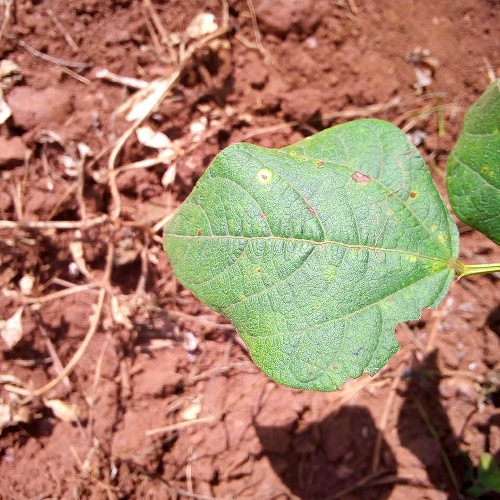

In [37]:
labels = ds['train'].features['labels']

im_label = labels.int2str(ex['labels']) 
print(im_label)
im

Filter: 100%|███████████████████████| 1034/1034 [00:03<00:00, 286.37 examples/s]


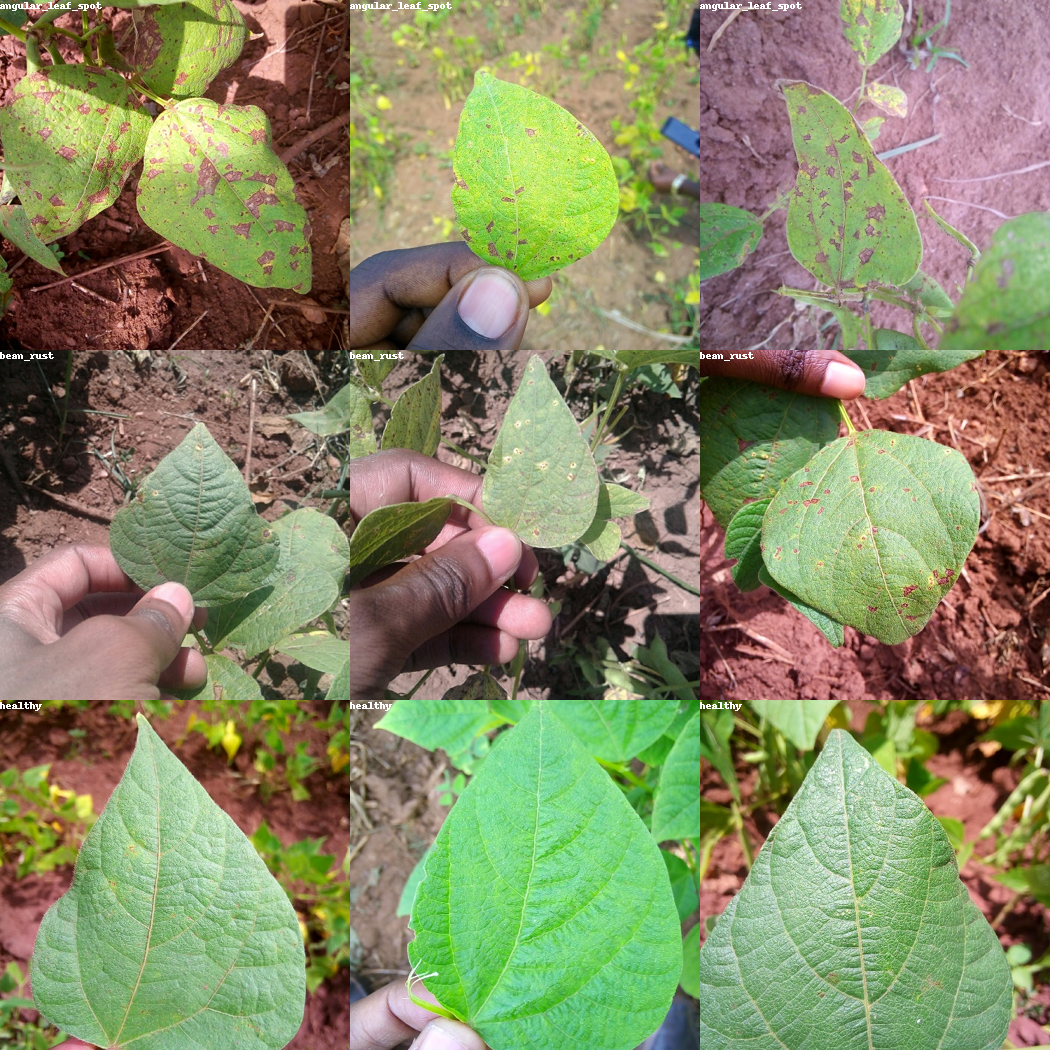

In [43]:
import random
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['labels'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
#     font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['labels'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255))

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)